In [2]:
import numpy as np
from numpy.fft import fft
import IPython
import scipy
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True

from recognition_utils import add_random_noise
import settings

We first load a sample audio track which we will later use to test the Gaussian noise function

In [3]:
path = "test.wav"
sample_rate_hz, audio_data = scipy.io.wavfile.read(path)
audio_data = np.mean(audio_data, axis=1) # convert stereo to mono
audio_data = audio_data[:(10 * sample_rate_hz)]
print(f'{sample_rate_hz=}')

IPython.display.Audio(audio_data, rate=sample_rate_hz)

44100


/opt/homebrew/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


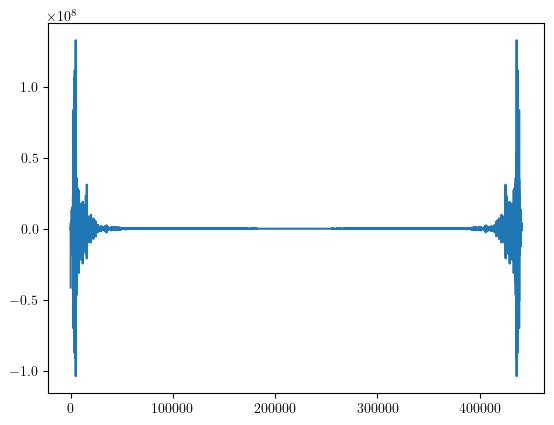

In [5]:
plt.plot(fft(audio_data))

Now, we add noise and compare the two audio clips

In [6]:
noisy_audio_data, noise = add_random_noise(audio_data, volume_ratio=1)
IPython.display.Audio(noisy_audio_data, rate=sample_rate_hz)

Mean noise level: 2656.825596371882


In [ ]:
plt.plot(fft(noisy_audio_data))

## Generate final plots

We generate comparisons of the time-domain and frequency-domain representations of the audio signal, with and without Gaussian noise.

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


<Figure size 640x480 with 0 Axes>

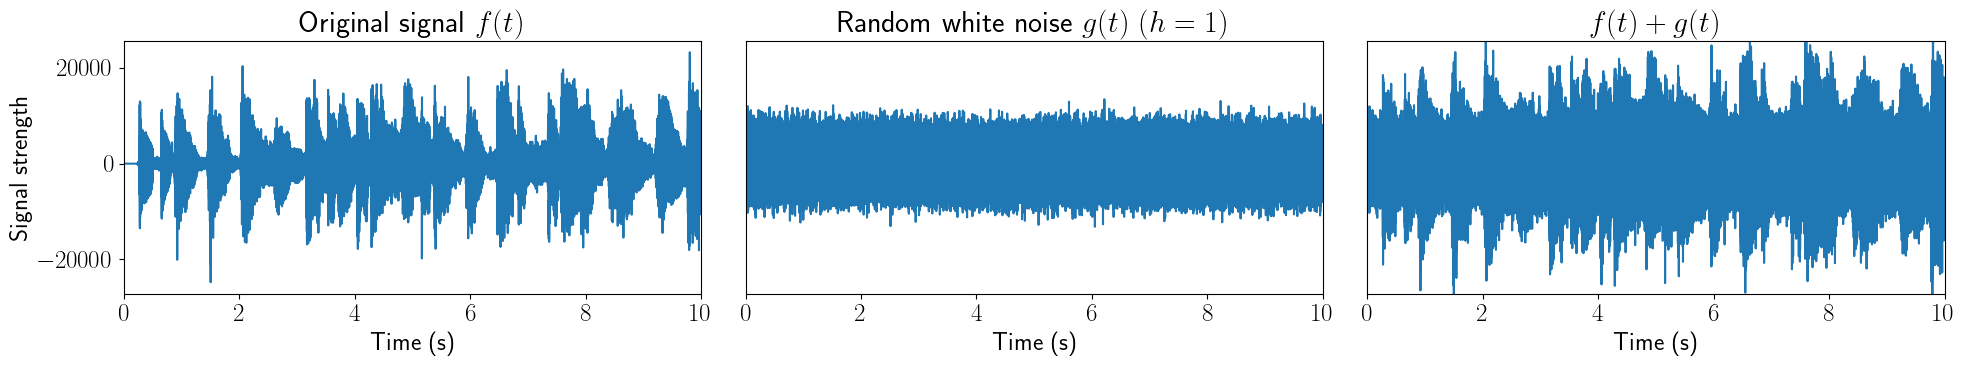

In [8]:
plt.clf()
plt.rcParams.update({'font.size': 18})
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20, 4)

labels = [x / sample_rate_hz for x in list(range(0, len(audio_data) + 1, sample_rate_hz))]

rescaled_audio_time_vals = np.linspace(0, len(audio_data) / sample_rate_hz, len(audio_data))

print(labels)

axs[0].plot(rescaled_audio_time_vals, audio_data)
axs[0].set_title("Original signal $f(t)$")
axs[0].set_xlim(0, 10)
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Signal strength")

axs[1].plot(rescaled_audio_time_vals, noise)
axs[1].set_title(r"Random white noise $g(t)$ $(h = 1)$")
axs[1].set_ylim(min(audio_data), max(audio_data))
axs[1].set_yticks([])
axs[1].set_xlim(0, 10)
axs[1].set_xlabel(r"Time (s)")

axs[2].plot(rescaled_audio_time_vals, noisy_audio_data)
axs[2].set_title(r"$f(t) + g(t)$")
axs[2].set_ylim(min(audio_data), max(audio_data))
axs[2].set_yticks([])
axs[2].set_xlim(0, 10)
axs[2].set_xlabel(r"Time (s)")

plt.tight_layout()
plt.savefig("./figs/noise-before-after-time-domain.png")

/opt/homebrew/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/lib/python3.11/site-packages/matplotlib/transforms.py:2868: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


<Figure size 640x480 with 0 Axes>

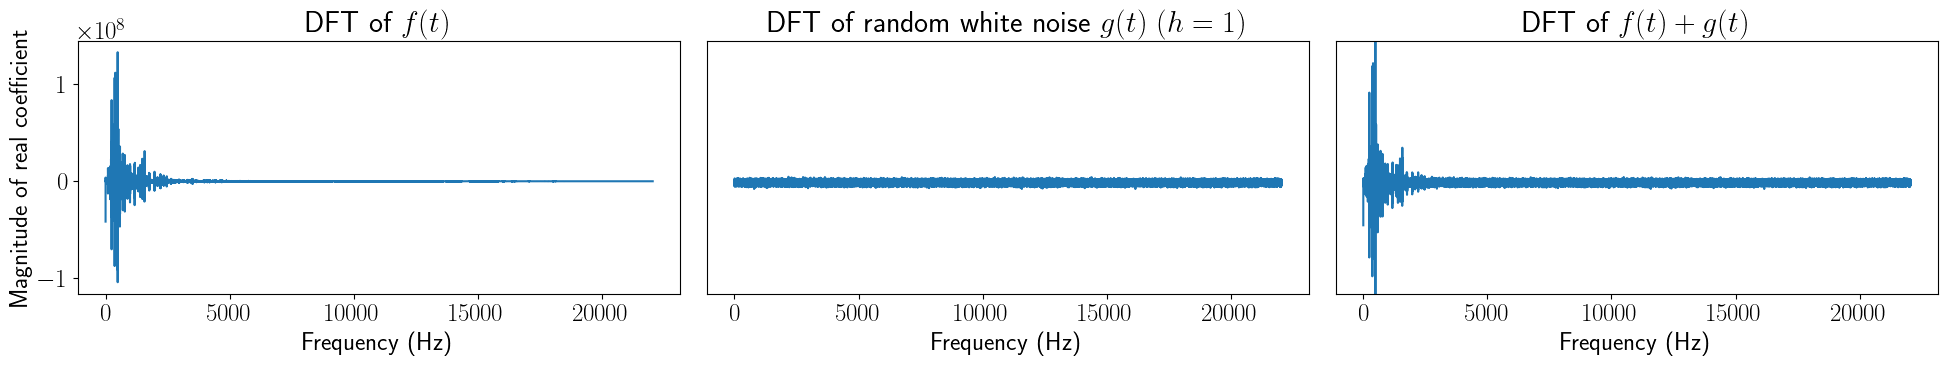

In [9]:
plt.clf()
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20, 4)

axs[0].plot(np.fft.rfftfreq(len(audio_data), d=1/sample_rate_hz), np.fft.rfft(audio_data))
axs[0].set_title("DFT of $f(t)$")
axs[0].set_xlabel("Frequency (Hz)")
axs[0].set_ylabel("Magnitude of real coefficient")

axs[1].plot(np.fft.rfftfreq(len(noise), d=1/sample_rate_hz), np.fft.rfft(noise))
axs[1].set_title("DFT of random white noise $g(t)$ $(h = 1)$")
axs[1].set_ylim(min(np.fft.rfft(audio_data)), max(np.fft.rfft(audio_data)))
axs[1].set_yticks([])
axs[1].set_xlabel("Frequency (Hz)")

axs[2].plot(np.fft.rfftfreq(len(noisy_audio_data), d=1/sample_rate_hz), np.fft.rfft(noisy_audio_data))
axs[2].set_title("DFT of $f(t) + g(t)$")
axs[2].set_ylim(min(np.fft.rfft(audio_data)), max(np.fft.rfft(audio_data)))
axs[2].set_yticks([])
axs[2].set_xlabel("Frequency (Hz)")

plt.tight_layout()
plt.savefig("./figs/noise-before-after-frequency-domain.png")

In [11]:
mean_noise_level = np.mean(np.abs(audio_data))
mean_noise_level = 20 * np.log10(mean_noise_level) # arbitrary number to make the graph more readable. use log 10 to scale relative to the original signal

# Generate sample distributions of varying noise levels
distributions = []
for noise_level in settings.NOISE_LEVELS:
    distributions.append(
        np.random.normal(0, noise_level * mean_noise_level, len(audio_data))
    )

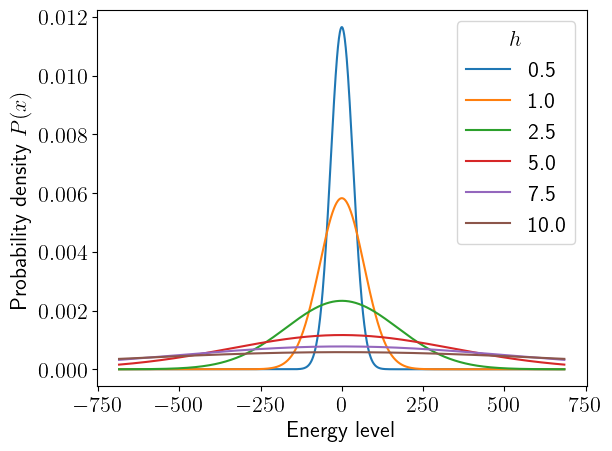

In [12]:
from scipy.stats import norm

plt.rcParams.update({'font.size': 16})
x_axis = np.arange(-10*mean_noise_level, 10*mean_noise_level, 1)

for noise_level in settings.NOISE_LEVELS[1:]: # No point trying to calculate 0 noise 
    plt.plot(x_axis, norm.pdf(x_axis,0,noise_level * mean_noise_level), label=f'{noise_level}')

plt.xlabel('Energy level')
plt.ylabel('Probability density $P(x)$')
plt.legend(title='$h$')
plt.tight_layout()
plt.savefig('./figs/noise_distributions.png')